In [116]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from matplotlib.dates import DateFormatter

In [75]:
def yeartemp(year):
    url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
    headers = {'token': 'Your Key Here'}
    params = {
        'datasetid': 'GHCND',
        'locationid': 'CITY:US240010',  # College Park, MD
        'startdate': f'{year}-03-01',
        'enddate': f'{year}-07-01',
        'units': 'standard',
        'datatypeid': 'TMIN',  # daily minimum temperature
        'limit': 1000,  # maximum number of results per API call
    }

    results = []

    while True:
        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code == 200:
            data = response.json()
            results += data['results']
            if 'next' in data['metadata']['resultset']:
                params['offset'] = data['metadata']['resultset']['offset'] + params['limit']
            else:
                break
        else:
            print(f"Error {response.status_code}: {response.reason} : {response.content}")
            break

    return results

In [46]:
def find_consecutive_days(data, threshold, consecutive_days):
    count = 0
    for entry in data:
        if entry['value'] >= threshold:
            count += 1
        else:
            count = 0
        
        if count == consecutive_days:
            return entry['date']
    
    return None

In [89]:
def format_date(date_str):
    date_obj = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S")
    return date_obj.strftime("%m-%d-%Y")


In [ ]:
df = pd.DataFrame(columns=["year", "date"])
for year in range(2002, 2023):
    print("Working on year ", year)
    data = yeartemp(year)
    plantDate = find_consecutive_days(data, 50, 5)
    new_row = {"year": year, "date":format_date(plantDate)}
    df = df.append(new_row, ignore_index=True)

In [145]:
df

,year,date,dummy_date
0,2002,2002-04-17,2000-04-17
1,2003,2003-05-10,2000-05-10
2,2004,2004-04-21,2000-04-21
3,2005,2005-05-12,2000-05-12
4,2006,2006-04-15,2000-04-15
5,2007,2007-05-12,2000-05-12
6,2008,2008-05-28,2000-05-28
7,2009,2009-04-28,2000-04-28
8,2010,2010-04-08,2000-04-08
9,2011,2011-04-26,2000-04-26


In [ ]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, "%m-%d-%Y"))

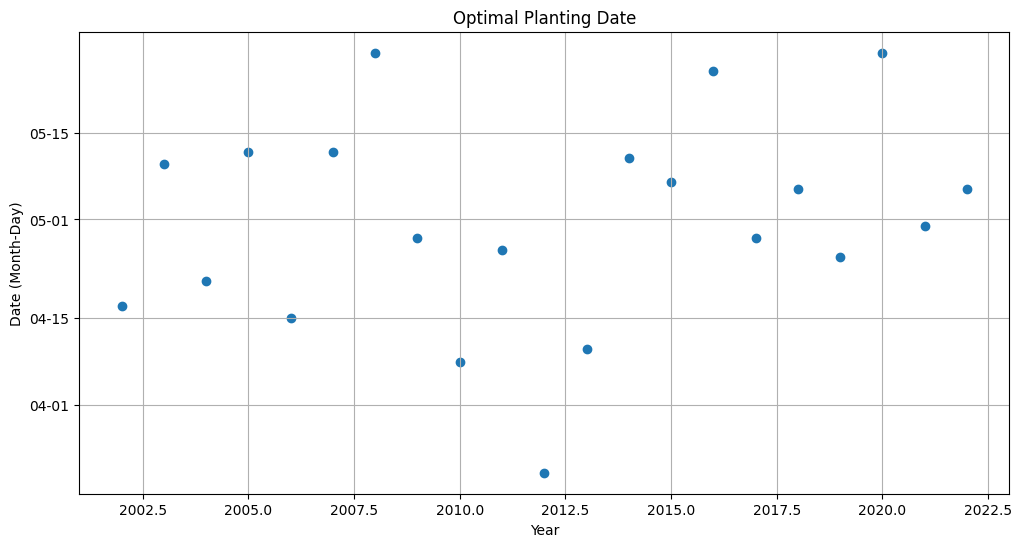

In [144]:
def plot_year_date_chart(df):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set the year of each datetime object to a dummy year (e.g., 2000) to be able to plot them
    dummy_year = 2000
    df['dummy_date'] = df['date'].apply(lambda x: x.replace(year=dummy_year))

    ax.scatter(df['year'], df['dummy_date'])
    ax.set_xlabel('Year')
    ax.set_ylabel('Date (Month-Day)')

    # Define a custom formatter function for the y-axis
    date_format = DateFormatter('%m-%d')
    ax.yaxis.set_major_formatter(date_format)

    plt.title('Optimal Planting Date')
    plt.grid(True)
    plt.show()

plot_year_date_chart(df)



In [135]:
def average_date(df):
    # Compute the mean of the day of the year
    mean_day_of_year = int(round(df['date'].apply(lambda x: x.timetuple().tm_yday).mean()))

    # Convert the mean day of the year back to a month-day-year format
    avg_date = (datetime(df['year'].iloc[0], 1, 1) + timedelta(days=mean_day_of_year - 1)).strftime('%m-%d')

    return avg_date
average_date(df)

'05-01'